# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [11]:
import os
os.chdir('/Users/yacinebenami/Desktop/MACS3/Analyse_de_donnees/MACS3_Stats_TDs')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [14]:
data_acars = pd.read_excel( './data/accars_b.xlsx')

In [15]:
print("Aperçu des données :")
print(data_acars.head())

Aperçu des données :
  flight_phase  engine_number  engine_type  aircraft_number  engine_position  \
0        CLIMB            186           10              192                1   
1        CLIMB            186           10              192                1   
2        CLIMB            186           10              192                1   
3        CLIMB            186           10              192                1   
4        CLIMB            186           10              192                1   

  airline_classif_environment  brat    cas  cycles   delfn  ...  ztoil  zvb1f  \
0                     Neutral   1.0  151.0     6.0 -0.1146  ...   88.0   0.57   
1                     Neutral   1.0  143.0     7.0 -0.2464  ...   90.8   0.58   
2                     Neutral   1.0  163.0     8.0     NaN  ...   89.0   0.28   
3                     Neutral   1.0  152.0     9.0     NaN  ...   87.0   0.44   
4                     Neutral   1.0  154.0    10.0     NaN  ...   85.3   0.26   

   zvb1r  z

#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

flight_phase                       0
engine_number                      0
engine_type                        0
aircraft_number                    0
engine_position                    0
airline_classif_environment      484
brat                               4
cas                            11920
cycles                         30553
delfn                            584
deln1                            584
dtamb                            584
egthdm                          1351
iai                                4
iaie1                            308
iaie2                            308
iaiwg                              4
ibe1                               0
ibe2                               0
ivs12                              0
pcn1k                           1351
sloatl                          1351
tsih                           32885
vbvpos                         27236
wbe                            36699
yn1mod                             4
zalt                              34
z

/var/folders/sz/74ncbmz13mg67zx7q7r3_4f00000gn/T/ipykernel_57201/979534297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=colonnes_manquantes.index, y=colonnes_manquantes.values, palette='viridis')


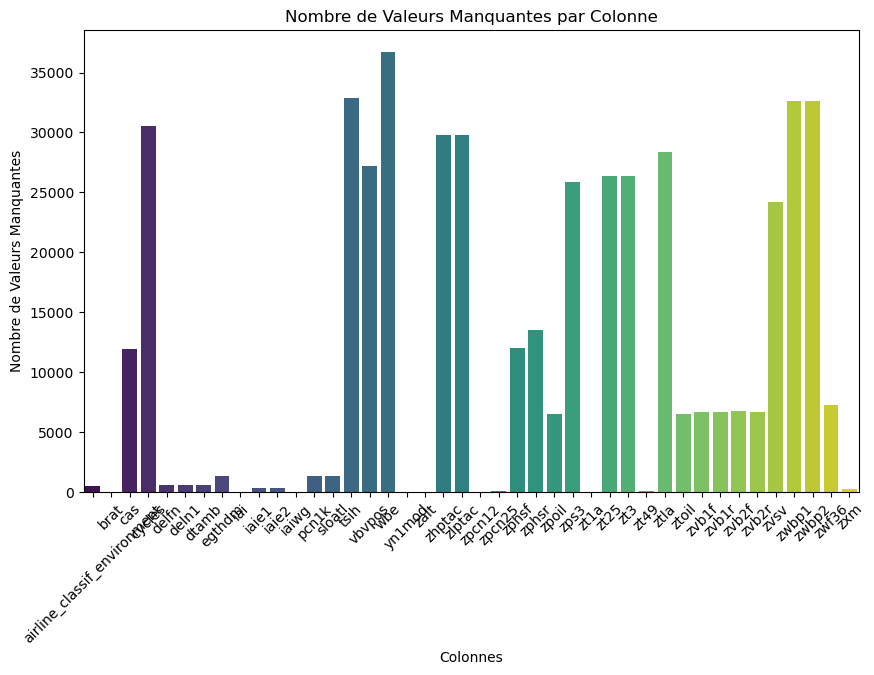

In [18]:
valeurs_manquantes = data_acars.isnull().sum()
print(valeurs_manquantes)

colonnes_manquantes = valeurs_manquantes[valeurs_manquantes > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=colonnes_manquantes.index, y=colonnes_manquantes.values, palette='viridis')
plt.title('Nombre de Valeurs Manquantes par Colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de Valeurs Manquantes')
plt.xticks(rotation=45)
plt.show()

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [28]:
data_acars2=data_acars.dropna(subset=['cycles','egthdm'])

#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [29]:
print(data_acars2["engine_type"].unique())

[10  5  7]


#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [35]:
moteur_T_10 = data_acars2[data_acars2['engine_type'] == 10]
nb_avions = moteur_T_10.groupby('aircraft_number').size()/2
print(nb_avions)

aircraft_number
11      17.0
14      97.0
190    110.0
191      6.0
192    126.0
dtype: float64


## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [36]:
avion_190 = data_acars[data_acars['aircraft_number'] == 190][['engine_number', 'cycles', 'egthdm']]
print(avion_190.head())

       engine_number  cycles   egthdm
11300            179     7.0      NaN
11301            179    31.0      NaN
11302            180    89.0      NaN
11303            180   191.0      NaN
11398            179    98.0  52.0118


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

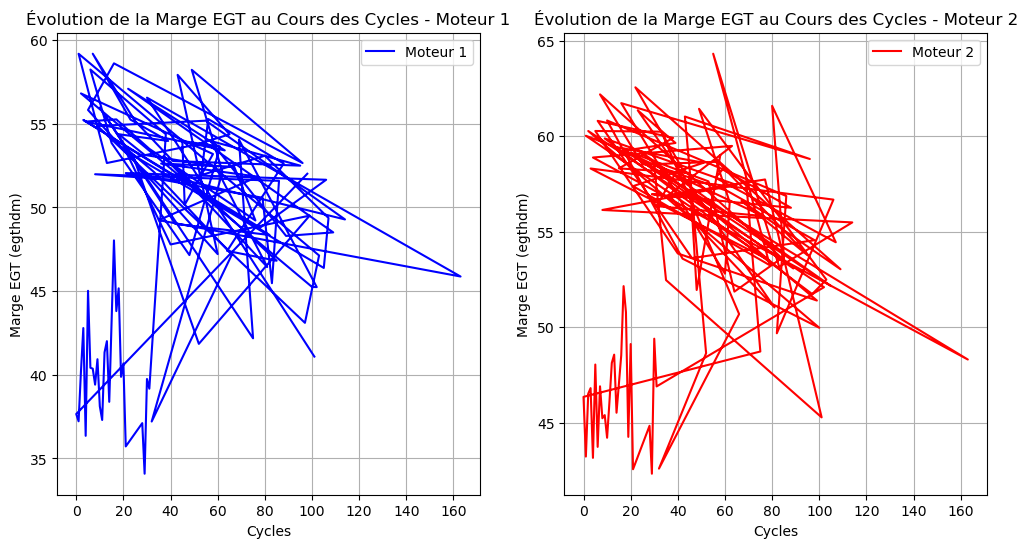

In [51]:
moteur1 = avion_190[avion_190['engine_number'] == 179]
moteur2 = avion_190[avion_190['engine_number'] == 180]

moteur1 = moteur1.dropna(subset=['cycles', 'egthdm'])
moteur2 = moteur2.dropna(subset=['cycles', 'egthdm'])

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(moteur1['cycles'], moteur1['egthdm'], label='Moteur 1', color='blue')
plt.title("Évolution de la Marge EGT au Cours des Cycles - Moteur 1")
plt.xlabel("Cycles")
plt.ylabel("Marge EGT (egthdm)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(moteur2['cycles'], moteur2['egthdm'], label='Moteur 2', color='red')
plt.title("Évolution de la Marge EGT au Cours des Cycles - Moteur 2")
plt.xlabel("Cycles")
plt.ylabel("Marge EGT (egthdm)")
plt.legend()
plt.grid(True)


#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [57]:
moteur179 = avion_190[avion_190['engine_number'] == 179]
moteur179 = moteur179.dropna(subset=['cycles'])


cycle_min = moteur179['cycles'].min()
cycle_max = moteur179['cycles'].max()
cycles_attendus = cycle_max - cycle_min + 1
vols_reels = moteur179['cycles'].nunique()
vols_manquants = cycles_attendus - vols_reels
print(f"Nombre de vols manquants pour le moteur 179 : {vols_manquants}")


Nombre de vols manquants pour le moteur 179 : 73.0


#### 2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [67]:
moteur179['cycles'] = moteur179['cycles'].astype(int)
egt = moteur179.groupby('cycles')['egthdm'].max().reset_index()
egt.rename(columns={'egthdm': 'max_egthdm'}, inplace=True)
print(egt.head())

   cycles  max_egthdm
0       0     37.6572
1       1     59.1796
2       2     56.8104
3       3     55.2263
4       4     55.1283


In [68]:
cycle_min = egt.index.min()
cycle_max = egt.index.max()
cycle_index = range(cycle_min, cycle_max + 1)
egt = egt.reindex(cycle_index)


print(egt.head(10))


   cycles  max_egthdm
0       0     37.6572
1       1     59.1796
2       2     56.8104
3       3     55.2263
4       4     55.1283
5       5     55.8223
6       6     58.2392
7       7     59.1825
8       8     51.9821
9       9     54.8652


#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

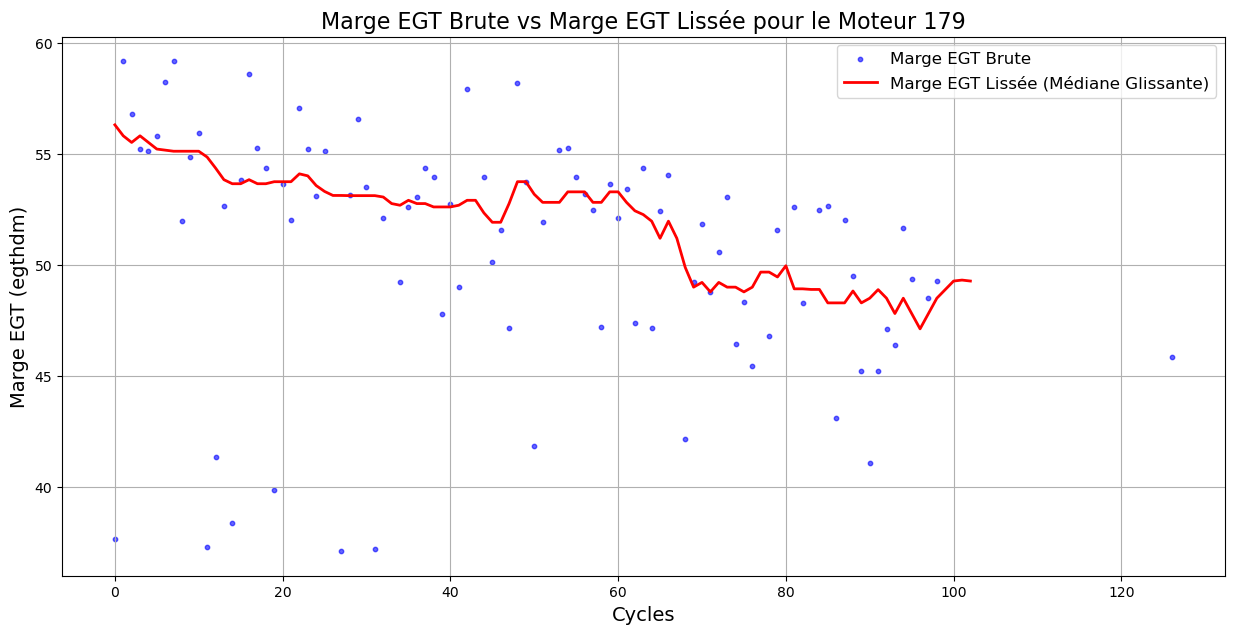

In [71]:
egt['egthdm_lisse'] = egt['max_egthdm'].rolling(window=15, min_periods=3, center=True).median()

plt.figure(figsize=(15, 7))

plt.scatter(egt.index, egt['max_egthdm'], label='Marge EGT Brute', color='blue', alpha=0.6, s=10)
plt.plot(egt.index, egt['egthdm_lisse'], label='Marge EGT Lissée (Médiane Glissante)', color='red', linewidth=2)

plt.title('Marge EGT Brute vs Marge EGT Lissée pour le Moteur 179', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.ylabel('Marge EGT (egthdm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)


#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

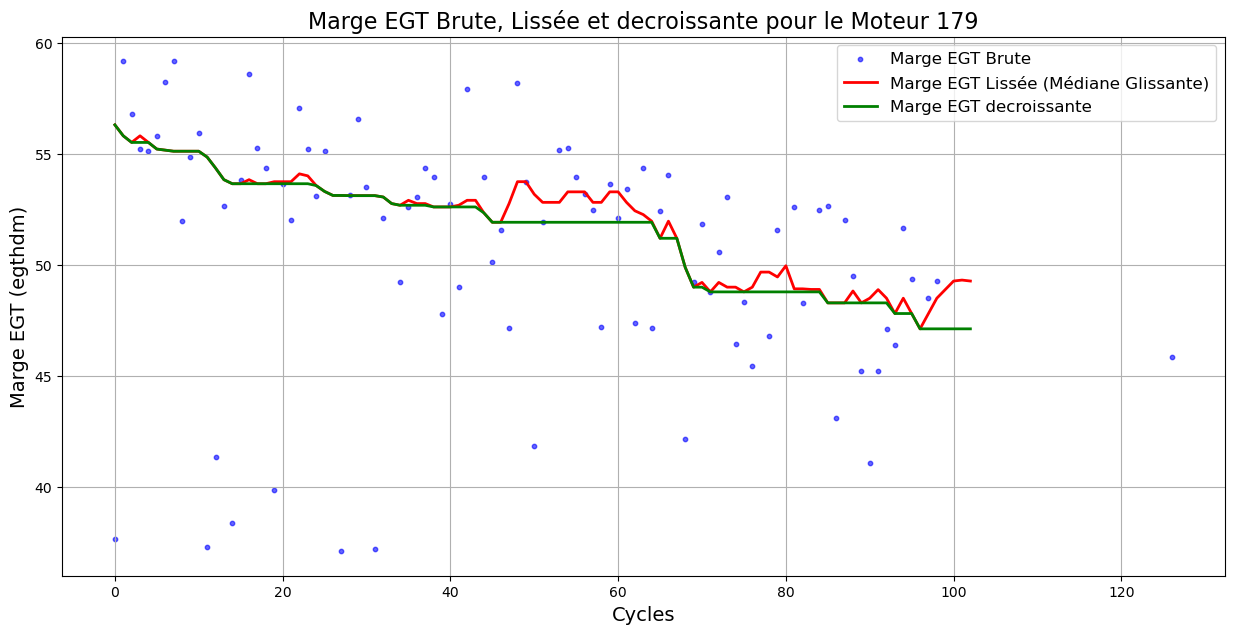

In [80]:
egt['decroissante'] = egt['egthdm_lisse'].cummin()

plt.figure(figsize=(15, 7))

plt.scatter(egt.index, egt['max_egthdm'], label='Marge EGT Brute', color='blue', alpha=0.6, s=10)
plt.plot(egt.index, egt['egthdm_lisse'], label='Marge EGT Lissée (Médiane Glissante)', color='red', linewidth=2)
plt.plot(egt.index, egt['decroissante'], label='Marge EGT decroissante', color='green', linewidth=2)

plt.title('Marge EGT Brute, Lissée et decroissante pour le Moteur 179', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.ylabel('Marge EGT (egthdm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

In [79]:
from sklearn.linear_model import LinearRegression
egt_clean = egt.dropna(subset=['decroissante'])

X = egt_clean.index.values.reshape(-1, 1)  
y = egt_clean['decroissante'].values  

lr = LinearRegression()
lr.fit(X, y)

print(f"Coefficient (pente) : {lr.coef_[0]:.4f}")
print(f"Ordonnée à l'origine : {lr.intercept_:.4f}")


Coefficient (pente) : -0.0832
Ordonnée à l'origine : 55.7237


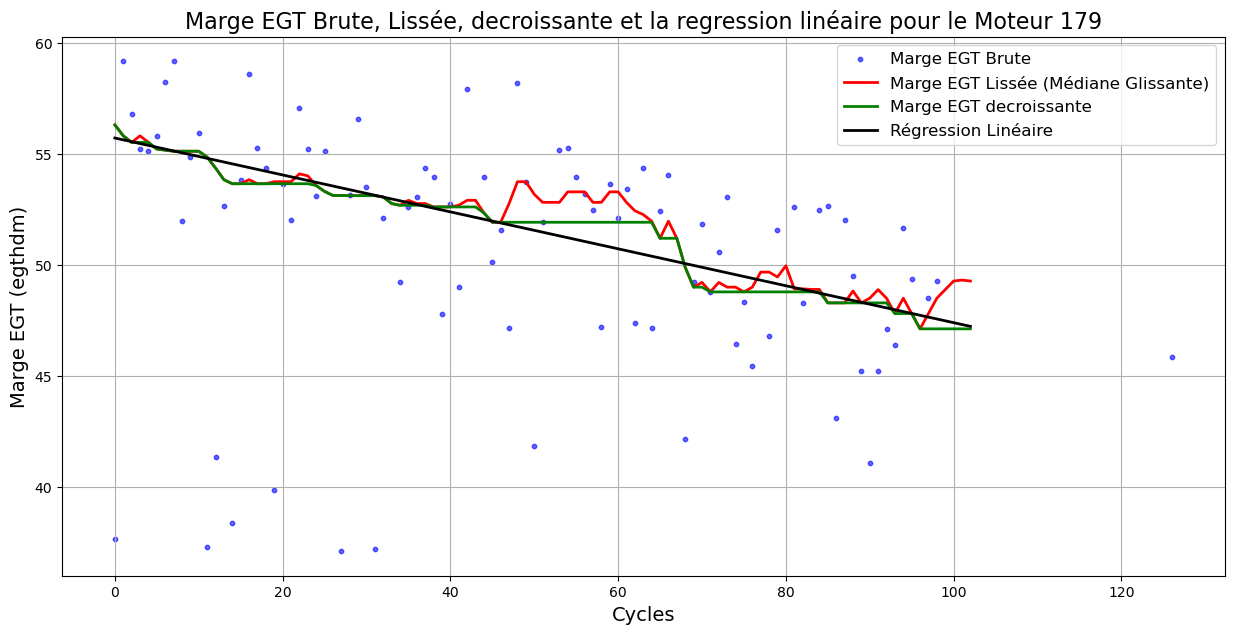

In [82]:
y_pred = lr.predict(X)

plt.figure(figsize=(15, 7))

plt.scatter(egt.index, egt['max_egthdm'], label='Marge EGT Brute', color='blue', alpha=0.6, s=10)
plt.plot(egt.index, egt['egthdm_lisse'], label='Marge EGT Lissée (Médiane Glissante)', color='red', linewidth=2)
plt.plot(egt.index, egt['decroissante'], label='Marge EGT decroissante', color='green', linewidth=2)
plt.plot(X.flatten(), y_pred, label='Régression Linéaire', color='black', linewidth=2)

plt.title('Marge EGT Brute, Lissée, decroissante et la regression linéaire pour le Moteur 179', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.ylabel('Marge EGT (egthdm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

In [85]:
def regress_egt_margin(df_acars):
    resultats = []
    moteurs = df_acars['engine_number'].dropna().unique()

    for moteur in moteurs:
        moteur_data = df_acars[df_acars['engine_number'] == moteur].copy()
        moteur_data = moteur_data.dropna(subset=['cycles'])
        if moteur_data.empty:
            continue

        moteur_data['cycles'] = moteur_data['cycles'].astype(int)
        egt = moteur_data.groupby('cycles')['egthdm'].max().reset_index()
        egt.rename(columns={'egthdm': 'max_egthdm'}, inplace=True)
        cycle_min = egt['cycles'].min()
        cycle_max = egt['cycles'].max()
        cycle_index = range(cycle_min, cycle_max + 1)
        egt = egt.reindex(cycle_index)
        egt['egt_lisse'] = egt['max_egthdm'].rolling(window=15, min_periods=3).median()
        egt['decroissante'] = egt['egt_lisse'].cummin()
       
        egt_clean = egt.dropna(subset=['decroissante'])
        if len(egt_clean) < 1:
            #print(f"Moteur {moteur} : Pas assez de points pour la régression.")
            continue

        X = egt_clean.index.values.reshape(-1, 1)  
        y = egt_clean['decroissante'].values  
        
        lr = LinearRegression()
        model = lr.fit(X, y)

        resultats.append({
                    'engine_number': moteur,
                    'slope': lr.coef_[0],
                    'intercept': lr.intercept_
        })
        df_regress_models = pd.DataFrame(resultats)

    return df_regress_models

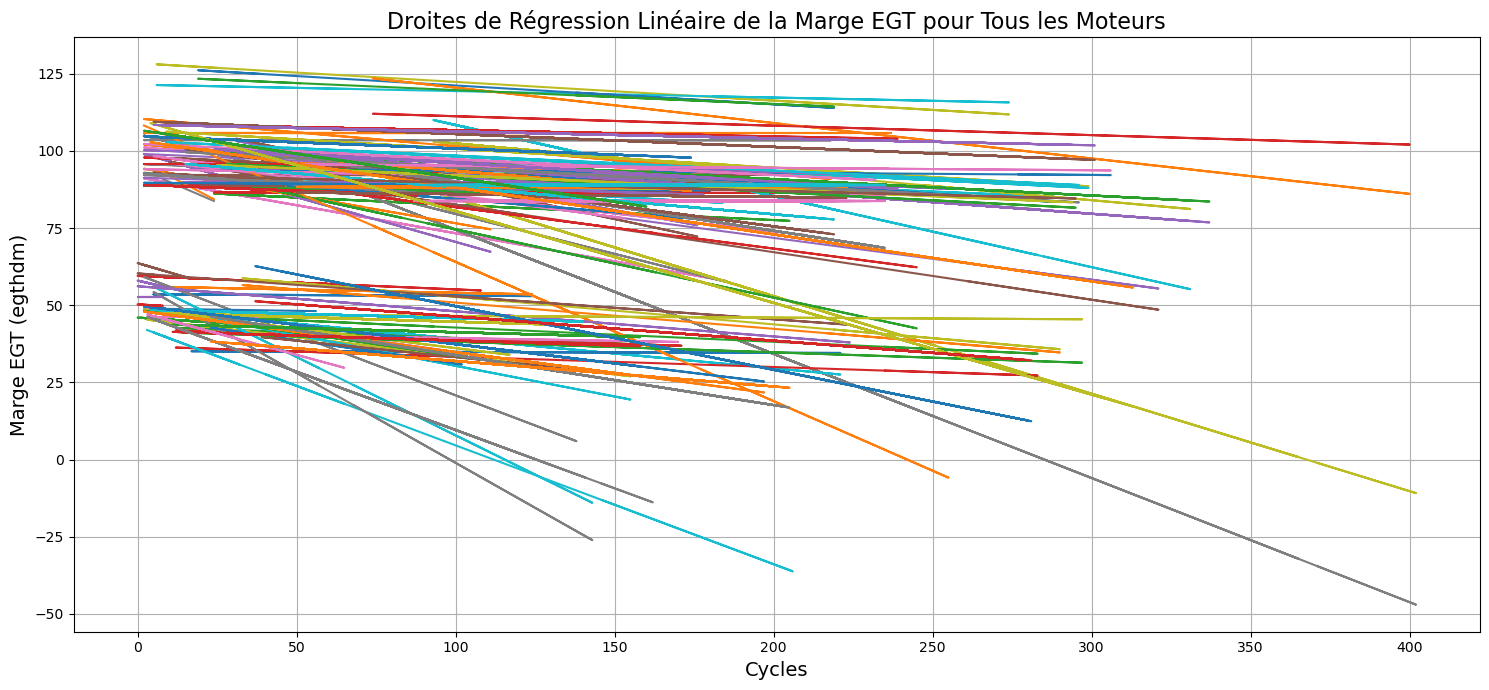

In [86]:
df_regress = regress_egt_margin(data_acars)

plt.figure(figsize=(15, 7))

for index, row in df_regress.iterrows():
    moteur = row['engine_number']
    slope = row['slope']
    intercept = row['intercept']
    
    X = data_acars[data_acars['engine_number'] == moteur]['cycles'].dropna().astype(int)
    y_pred = slope * X + intercept
    

    plt.plot(X, y_pred, label=f'Regression Moteur {moteur}')

plt.title('Droites de Régression Linéaire de la Marge EGT pour Tous les Moteurs', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.ylabel('Marge EGT (egthdm)', fontsize=14)
#plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende en dehors du graphique
plt.grid(True)
plt.tight_layout()

### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

In [89]:
#1 
df_regress_models = regress_egt_margin(data_acars)
df_regress_models['egt_margin_150'] = df_regress_models.apply(
    lambda row: row['slope'] * 150 + row['intercept'],
    axis=1
)

print(df_regress_models[['engine_number', 'slope', 'intercept', 'egt_margin_150']].head())

   engine_number     slope  intercept  egt_margin_150
0            186 -0.004563  53.546816       52.862310
1            187 -0.020750  56.114424       53.001926
2            184 -0.067261  46.004486       35.915290
3            188 -0.043783  59.516094       52.948596
4            183 -0.239841  58.006370       22.030155


<Figure size 1200x600 with 0 Axes>

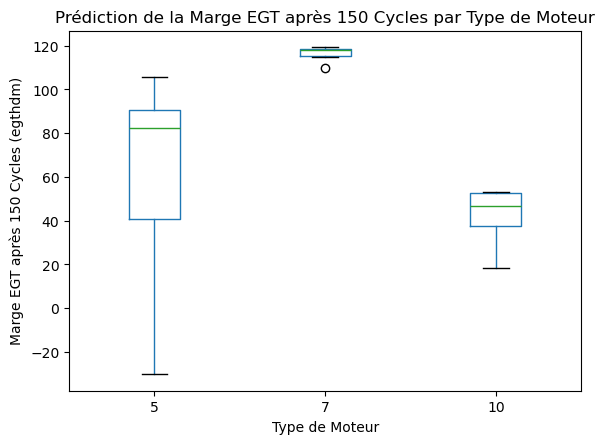

In [90]:
#2
engine_type_mapping = data_acars[['engine_number', 'engine_type']].drop_duplicates().set_index('engine_number')['engine_type']
df_regress_models['engine_type'] = df_regress_models['engine_number'].map(engine_type_mapping)
plt.figure(figsize=(12, 6))
df_regress_models.boxplot(column='egt_margin_150', by='engine_type', grid=False)
plt.title('Prédiction de la Marge EGT après 150 Cycles par Type de Moteur')
plt.suptitle('')  # Supprimer le titre par défaut
plt.xlabel('Type de Moteur')
plt.ylabel('Marge EGT après 150 Cycles (egthdm)')
plt.show()

In [92]:
moyenne_egt_margin_150 = df_regress_models.groupby('engine_type')['egt_margin_150'].mean().reset_index()
max_mean = moyenne_egt_margin_150['egt_margin_150'].max()
max_mean_type = moyenne_egt_margin_150[moyenne_egt_margin_150['egt_margin_150'] == max_mean]['engine_type'].values[0]

print(f"Le type de moteur avec la plus grande marge moyenne après 150 cycles est : {max_mean_type} avec une marge moyenne de {max_mean:.2f} egthdm.")

Le type de moteur avec la plus grande marge moyenne après 150 cycles est : 7 avec une marge moyenne de 116.32 egthdm.


#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?

1. egthdm/cycle

<Figure size 1200x600 with 0 Axes>

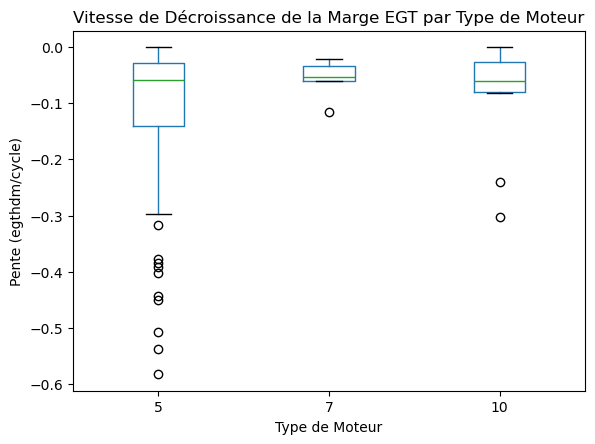

In [94]:
#2
engine_type_mapping = data_acars[['engine_number', 'engine_type']].drop_duplicates().set_index('engine_number')['engine_type']
df_regress_models['engine_type'] = df_regress_models['engine_number'].map(engine_type_mapping)
plt.figure(figsize=(12, 6))
df_regress_models.boxplot(column='slope', by='engine_type', grid=False)
plt.title('Vitesse de Décroissance de la Marge EGT par Type de Moteur')
plt.suptitle('')  # Supprimer le titre par défaut
plt.xlabel('Type de Moteur')
plt.ylabel('Pente (egthdm/cycle)')
plt.show()

In [95]:
#3
mean_slope_by_type = df_regress_models.groupby('engine_type')['slope'].mean().reset_index()
mean_slope_by_type.rename(columns={'slope': 'mean_slope'}, inplace=True)

min_mean_slope = mean_slope_by_type['mean_slope'].min()
min_mean_slope_type = mean_slope_by_type[mean_slope_by_type['mean_slope'] == min_mean_slope]['engine_type'].values[0]

print(f"Le type de moteur avec la plus faible vitesse de décroissance est : {min_mean_slope_type} avec une pente moyenne de {min_mean_slope:.4f} egthdm/cycle.")


Le type de moteur avec la plus faible vitesse de décroissance est : 5 avec une pente moyenne de -0.1067 egthdm/cycle.
